In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 9]
df = yf.download('EURUSD=X',start='2010-01-01')

df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)
df = df.resample('W').last()
series = df['Close']

[*********************100%***********************]  1 of 1 completed


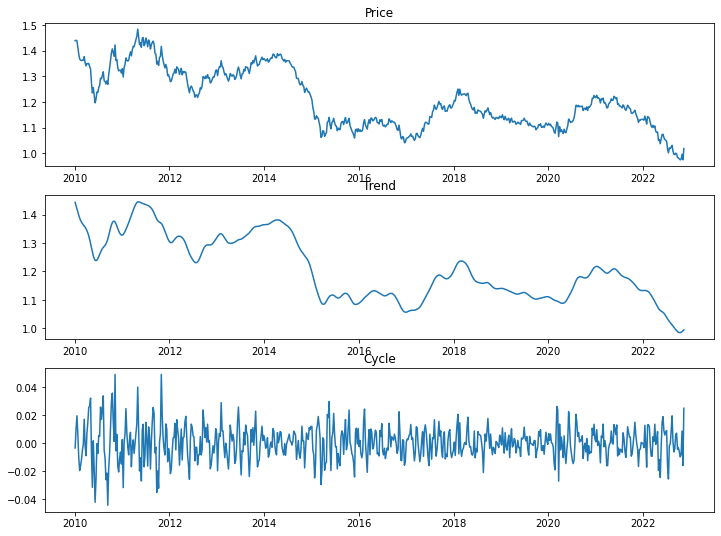

In [2]:
cycle, trend = sm.tsa.filters.hpfilter(series, 50)
fig, ax = plt.subplots(3,1)
ax[0].plot(series)
ax[0].set_title('Price')
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[2].plot(cycle)
ax[2].set_title('Cycle')
plt.show()

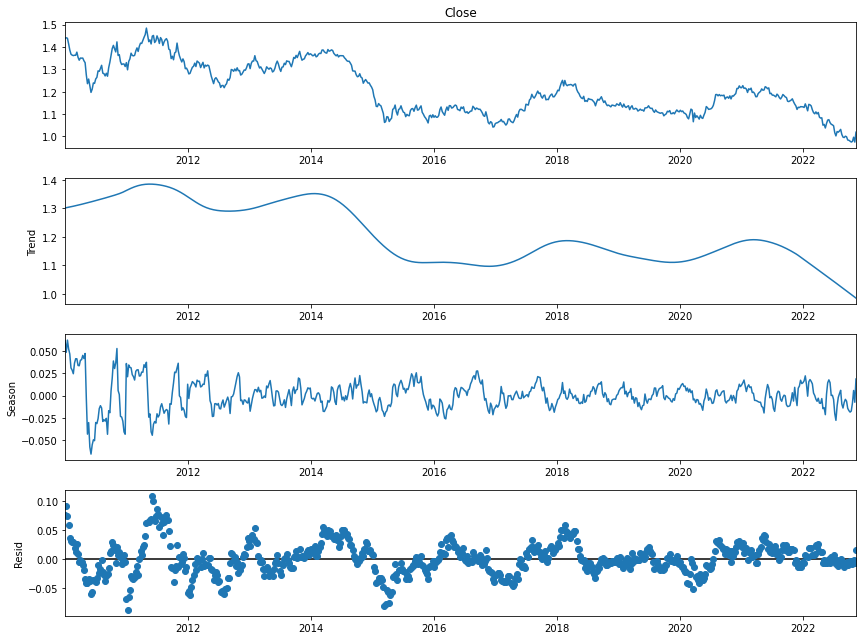

In [3]:
result = STL(series).fit()
chart = result.plot()
plt.show()

Test RMSE: 0.01200


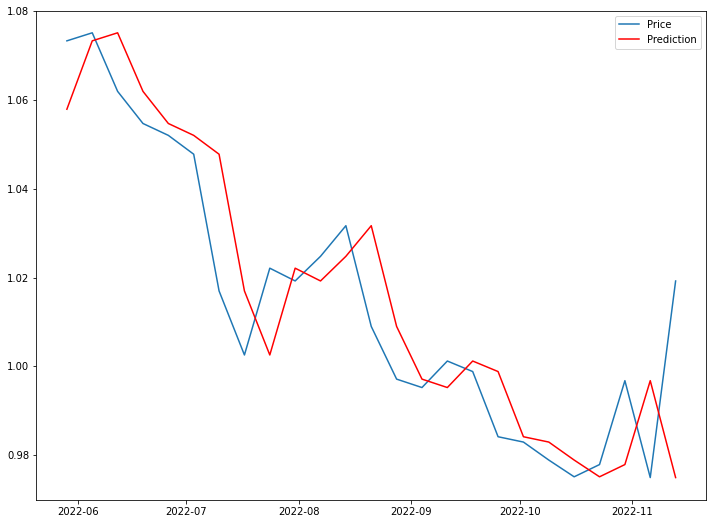

In [4]:
predictions = series.shift(1).dropna()
test_score = np.sqrt(mean_squared_error(series[int(len(series) * 0.7)+1:], predictions.iloc[int(len(series) * 0.7):]))
print('Test RMSE: %.5f' % test_score)
plt.plot(series.iloc[-25:], label='Price')
plt.plot(predictions[-25:], color='red', label='Prediction')
plt.legend()
plt.show()

C:\Users\npc94\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


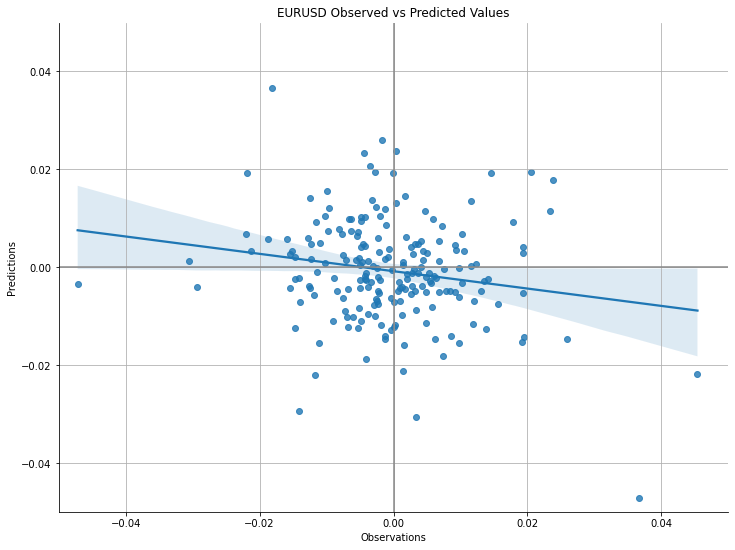

The MAE is 0.012


In [5]:
fig, ax = plt.subplots()
ax = sns.regplot(series.iloc[-int(len(series) * 0.3):].pct_change(),
            predictions.iloc[-int(len(series) * 0.3):].pct_change(), )
plt.xlabel('Observations')
plt.ylabel('Predictions')
plt.title('EURUSD Observed vs Predicted Values')
ax.grid(True, which='both')
ax.axhline(y=0, color='#888888')
ax.axvline(x=0, color='#888888')
sns.despine(ax=ax, offset=0)
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)
plt.show()
mae = round(abs(series.iloc[-int(len(series) * 0.3):].pct_change() - predictions.iloc[-int(len(series) * 0.3):].pct_change()).mean(),4)
print(f'The MAE is {mae}')

In [6]:
price_pred = pd.concat([series.iloc[-int(len(series) * 0.3):].pct_change(), predictions.iloc[-int(len(series) * 0.3):].pct_change()], axis=1)
price_pred.dropna(inplace=True)
price_pred.columns = ['Price', 'preds']
price_pred['hit'] = np.where(np.sign(price_pred['Price']) == np.sign(price_pred['preds']), 1, 0)
print(f"Hit rate: {round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2)}%")

Hit rate: 43.0%


In [7]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

Test MSE: 0.01200


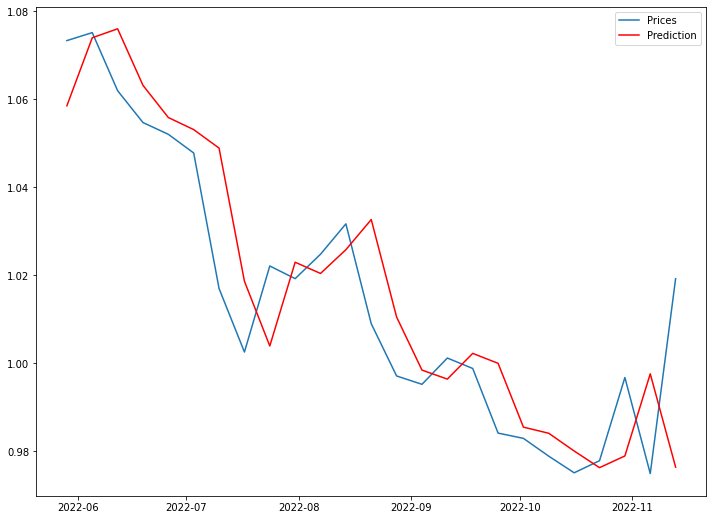

In [8]:
historic = series.iloc[:int(len(series) * 0.7)].to_list()
test = series.iloc[int(len(series) * 0.7):]
predictions = []
for i in range(len(test)):
    model = AutoReg(historic,lags=2)
    model_fit = model.fit()
    pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
    predictions.append(pred[0])
    historic.append(test[i])
    
predictions = pd.Series(predictions, index=test.index)
    
test_score = np.sqrt(mean_squared_error(test, predictions))
print('Test MSE: %.5f' % test_score)
# plot results
plt.plot(test.iloc[-25:], label='Prices')
plt.plot(predictions.iloc[-25:], color='red', label='Prediction')
plt.legend()
plt.show()

C:\Users\npc94\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


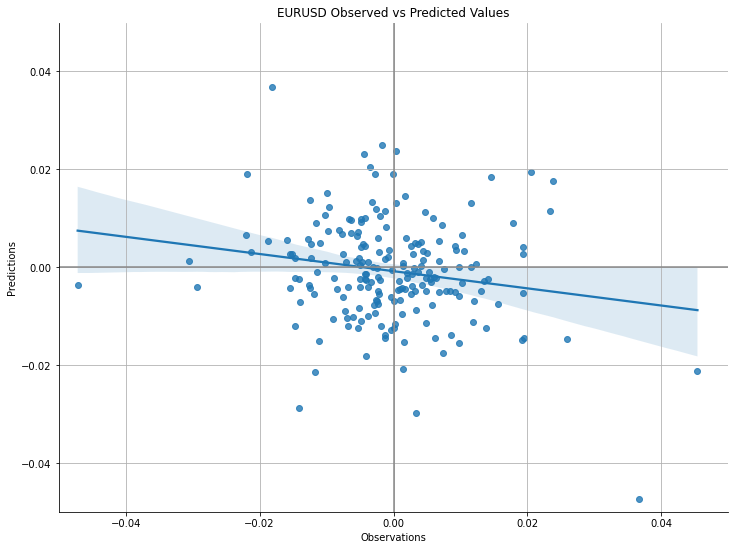

The MAE is 0.0118995978


In [9]:
fig, ax = plt.subplots()
ax = sns.regplot(series.iloc[-int(len(series) * 0.3):].pct_change(),
            predictions.iloc[-int(len(series) * 0.3):].pct_change(), )
plt.xlabel('Observations')
plt.ylabel('Predictions')
plt.title('EURUSD Observed vs Predicted Values')
ax.grid(True, which='both')
ax.axhline(y=0, color='#888888')
ax.axvline(x=0, color='#888888')
sns.despine(ax=ax, offset=0)
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)
plt.show()
mae = round(abs(test.pct_change() - predictions.pct_change()).mean(),10)
print(f'The MAE is {mae}')

In [10]:
price_pred = pd.concat([test.pct_change(), predictions.pct_change()], axis=1)
price_pred.dropna(inplace=True)
price_pred.columns = ['Price', 'preds']
price_pred['hit'] = np.where(np.sign(price_pred['Price']) == np.sign(price_pred['preds']), 1, 0)
print(f"Hit rate: {round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2)}%")

Hit rate: 43.28%


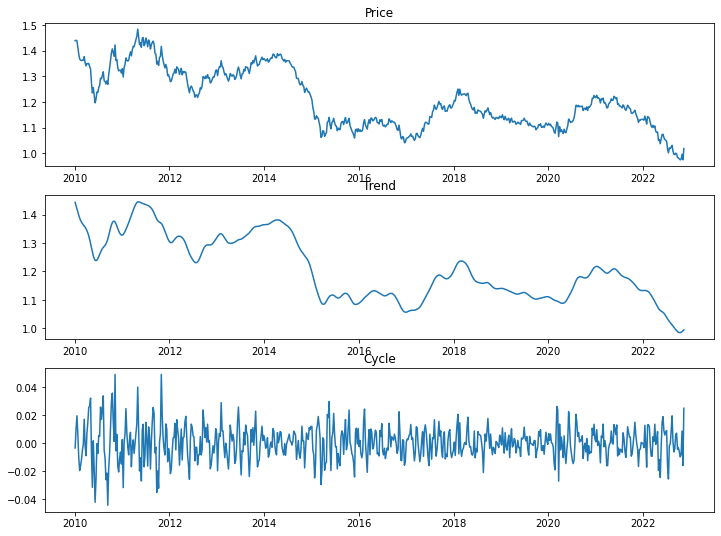

In [11]:
cycle, trend = sm.tsa.filters.hpfilter(series, 50)
fig, ax = plt.subplots(3,1)
ax[0].plot(series)
ax[0].set_title('Price')
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[2].plot(cycle)
ax[2].set_title('Cycle')
plt.show()

Test for trend MSE: 0.0006240891750746126


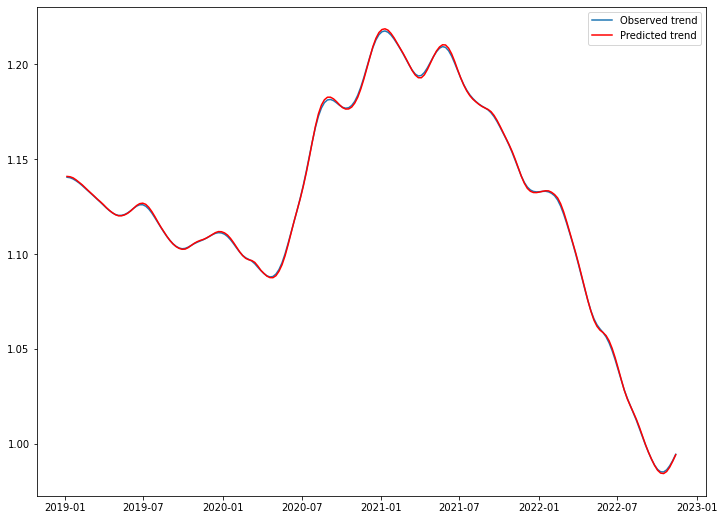

Test for cycle MSE: 0.009029937010559569


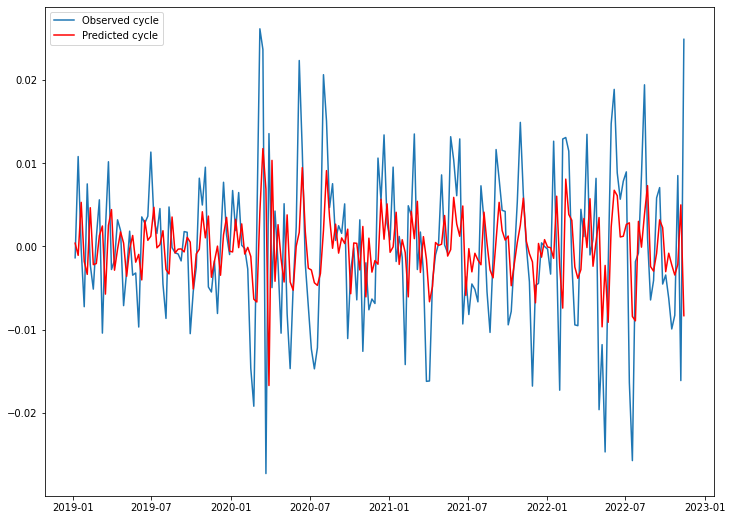

In [12]:
component_dict = {'cycle': cycle, 'trend': trend}
prediction_results = []
for component in ['trend', 'cycle']:
    historic = component_dict[component].iloc[:int(len(series) * 0.7)].to_list()
    test = component_dict[component].iloc[int(len(series) * 0.7):]
    predictions = []
    for i in range(len(test)):
        model = AutoReg(historic,lags=2)
        model_fit = model.fit()
        pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
        predictions.append(pred[0])
        historic.append(test[i])
    predictions = pd.Series(predictions, index=test.index, name=component)
    prediction_results.append(predictions)
    test_score = np.sqrt(mean_squared_error(test, predictions))
    print(f'Test for {component} MSE: {test_score}')
    # plot results
    plt.plot(test.iloc[:], label='Observed '+component)
    plt.plot(predictions.iloc[:], color='red', label='Predicted '+component)
    plt.legend()
    plt.show()

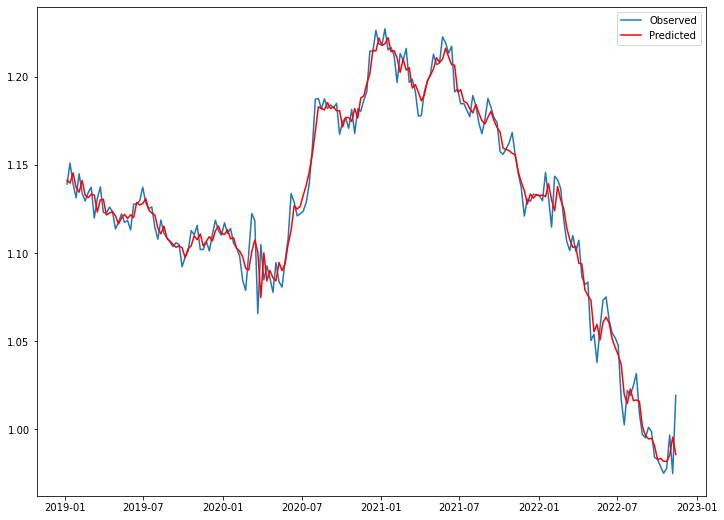

RMSE: 0.008914991458525543


In [13]:
recomposed_preds = pd.concat(prediction_results,axis=1).sum(axis=1)
recomposed_preds.name = 'recomposed_preds'
plt.plot(series.iloc[int(len(series) * 0.7):], label='Observed')
plt.plot(recomposed_preds, color='red', label='Predicted')
plt.legend()
plt.show()
test_score = np.sqrt(mean_squared_error(series.iloc[int(len(series) * 0.7):], recomposed_preds))
print(f'RMSE: {test_score}')

C:\Users\npc94\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


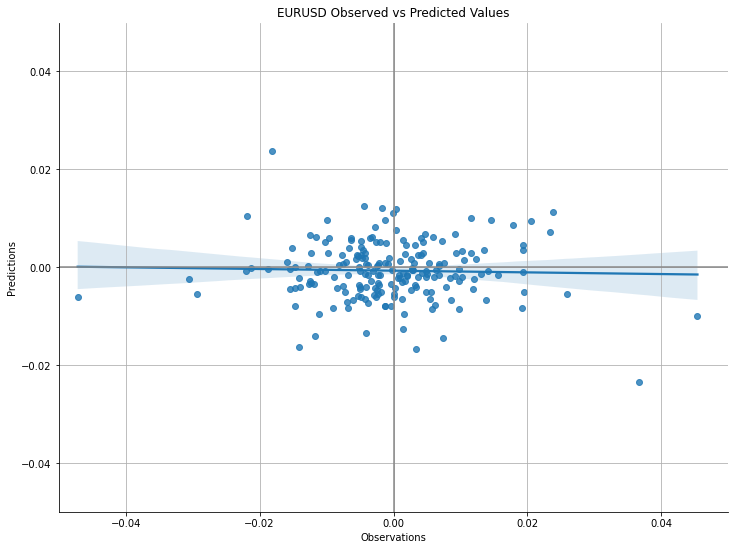

The MAE is 0.0090764905


In [14]:
fig, ax = plt.subplots()
ax = sns.regplot(series.iloc[-int(len(series) * 0.3):].pct_change(),
            recomposed_preds.iloc[-int(len(series) * 0.3):].pct_change())
plt.xlabel('Observations')
plt.ylabel('Predictions')
plt.title('EURUSD Observed vs Predicted Values')
ax.grid(True, which='both')
ax.axhline(y=0, color='#888888')
ax.axvline(x=0, color='#888888')
sns.despine(ax=ax, offset=0)
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)
plt.show()
mae = round(abs(series.iloc[-int(len(series) * 0.3):].pct_change() - 
                recomposed_preds.iloc[-int(len(series) * 0.3):].pct_change()).mean(),10)
print(f'The MAE is {mae}')

In [15]:
price_pred = pd.concat([series.iloc[-int(len(series) * 0.3):].pct_change(),recomposed_preds.iloc[-int(len(series) * 0.3):].pct_change()], axis=1)
price_pred.dropna(inplace=True)
price_pred['hit'] = np.where(np.sign(price_pred['Close']) == np.sign(price_pred['recomposed_preds']), 1, 0)
print(f"Hit rate: {round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2)}%")

Hit rate: 48.0%


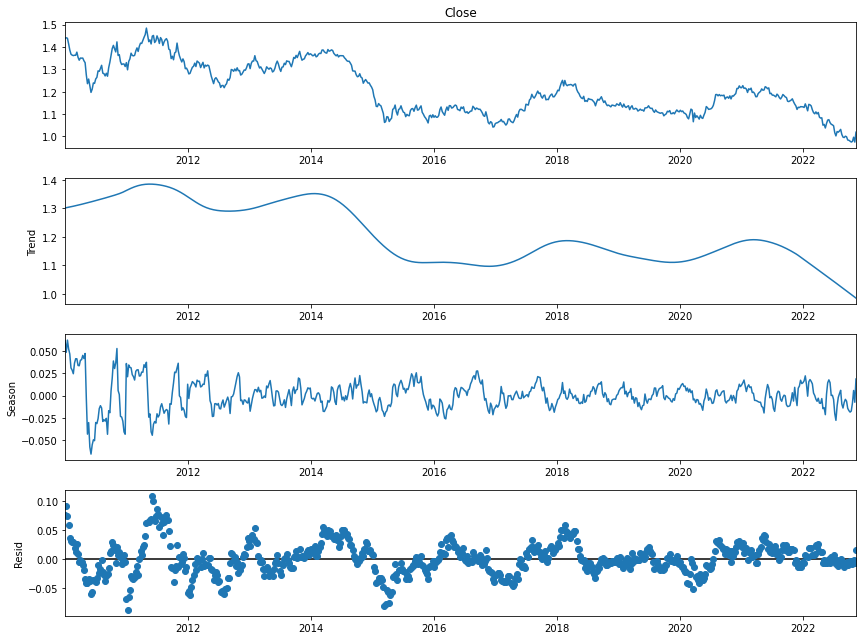

In [16]:
result = STL(series).fit()
result.plot()
plt.show()

In [17]:
result.seasonal.head()

Date
2010-01-03    0.061459
2010-01-10    0.048248
2010-01-17    0.061889
2010-01-24    0.052084
2010-01-31    0.046340
Freq: W-SUN, Name: season, dtype: float64

Test for seasonal MSE: 0.006412466822338588


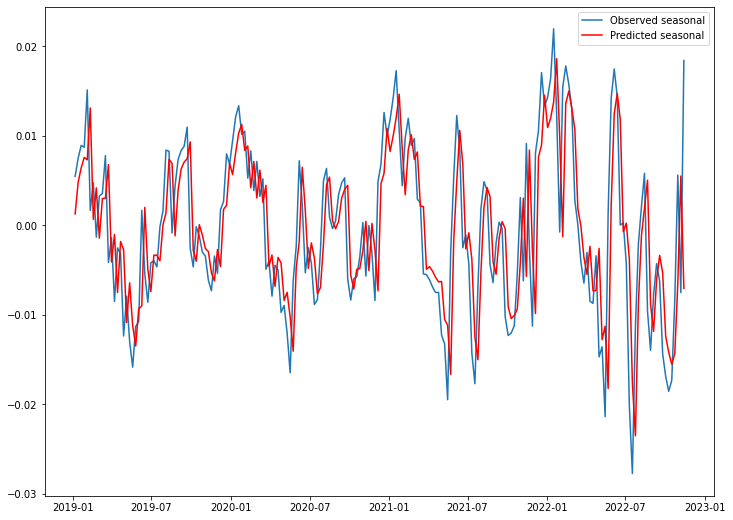

Test for trend MSE: 5.7691863063641795e-05


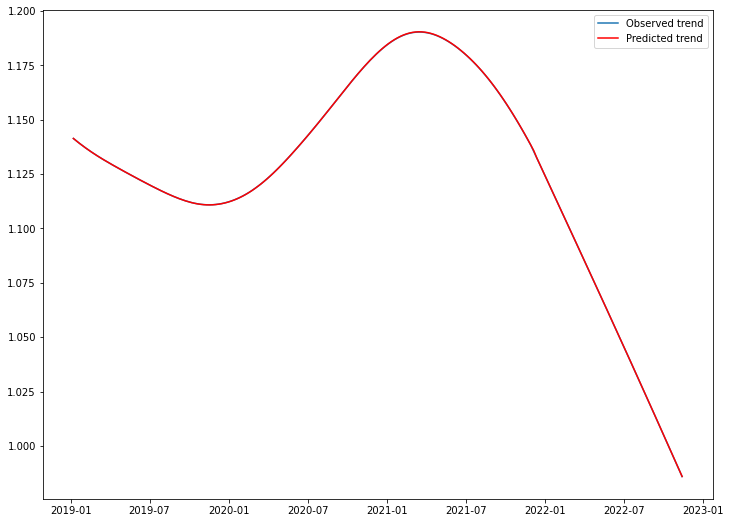

Test for residual MSE: 0.009132762779009507


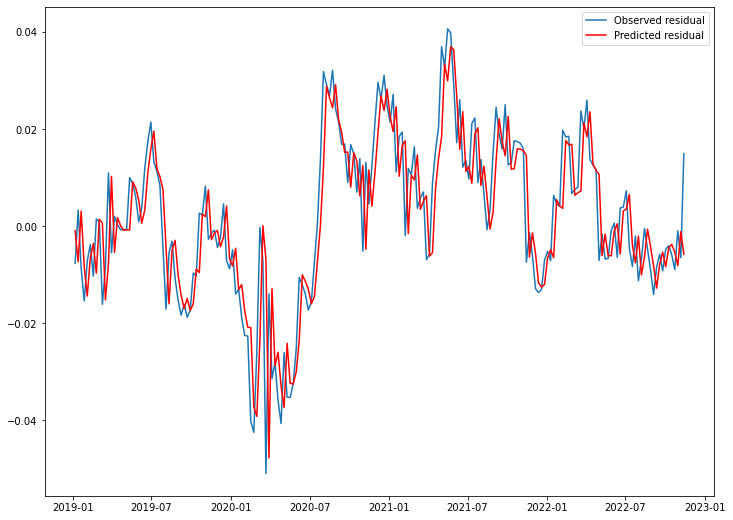

In [18]:
component_dict = {'seasonal': result.seasonal, 'trend': result.trend, 'residual': result.resid}
prediction_results = []
for component in ['seasonal', 'trend', 'residual']:
    historic = component_dict[component].iloc[:int(len(series) * 0.7)].to_list()
    test = component_dict[component].iloc[int(len(series) * 0.7):]
    predictions = []
    for i in range(len(test)):
        model = AutoReg(historic,lags=2)
        model_fit = model.fit()
        pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
        predictions.append(pred[0])
        historic.append(test[i])
    predictions = pd.Series(predictions, index=test.index, name=component)
    prediction_results.append(predictions)
    test_score = np.sqrt(mean_squared_error(test, predictions))
    print(f'Test for {component} MSE: {test_score}')
    # plot results
    plt.plot(test.iloc[:], label='Observed '+component)
    plt.plot(predictions.iloc[:], color='red', label='Predicted '+component)
    plt.legend()
    plt.show()

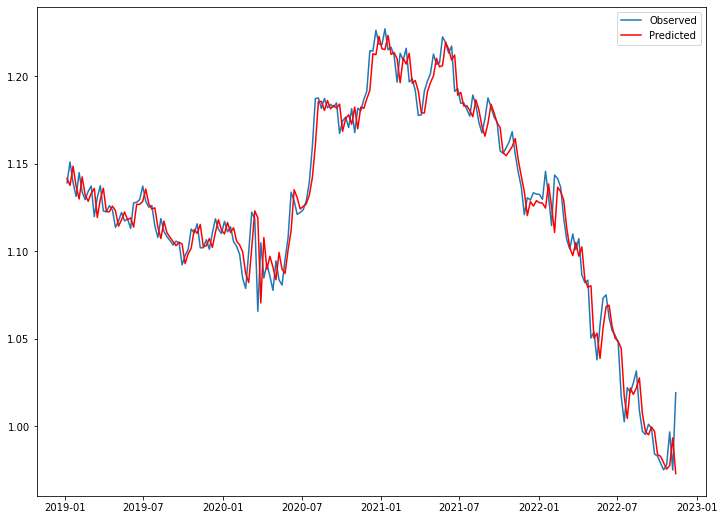

RMSE: 0.0113671261113786


In [19]:
recomposed_preds = pd.concat(prediction_results,axis=1).sum(axis=1)
plt.plot(series.iloc[int(len(series) * 0.7):], label='Observed')
plt.plot(recomposed_preds, color='red', label='Predicted')
plt.legend()
plt.show()
test_score = np.sqrt(mean_squared_error(series.iloc[int(len(series) * 0.7):], recomposed_preds))
print(f'RMSE: {test_score}')

C:\Users\npc94\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


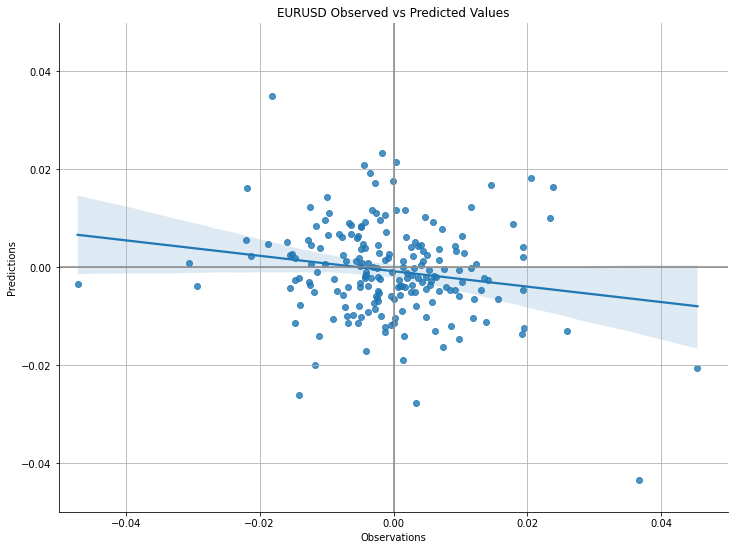

The MAE is 0.0113906781


In [20]:
fig, ax = plt.subplots()
ax = sns.regplot(series.iloc[-int(len(series) * 0.3):].pct_change(),
            recomposed_preds.iloc[-int(len(series) * 0.3):].pct_change(), )
plt.xlabel('Observations')
plt.ylabel('Predictions')
plt.title('EURUSD Observed vs Predicted Values')
ax.grid(True, which='both')
ax.axhline(y=0, color='#888888')
ax.axvline(x=0, color='#888888')
sns.despine(ax=ax, offset=0)
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)
plt.show()
mae = round(abs(series.iloc[-int(len(series) * 0.3):].pct_change() - 
                recomposed_preds.iloc[-int(len(series) * 0.3):].pct_change()).mean(),10)
print(f'The MAE is {mae}')

In [21]:
price_pred = pd.concat([series.iloc[-int(len(series) * 0.3):].pct_change(), 
                recomposed_preds.iloc[-int(len(series) * 0.3):].pct_change()], axis=1)
price_pred.dropna(inplace=True)
price_pred.columns = ['Price', 'preds']
price_pred['hit'] = np.where(np.sign(price_pred['Price']) == np.sign(price_pred['preds']), 1, 0)
print(f"Hit rate: {round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2)}%")

Hit rate: 42.0%
